- [ ] use hyperlink to create a table of contents

In [61]:
# Set up packages
!pip install category_encoders
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from itertools import chain, combinations

pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn')

<ipython-input-61-72d37e3bd829>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [620]:
data = pd.read_csv('/content/Housing_Data_Train.csv') # Read the training data set.

# Data Pre-Processing





## `NaN`s

In [621]:
# Check the NaN values
for column in data:
    if data[column].isna().any():
        print(f"Column '{column}' contains NaN values")

Column 'LotFrontage' contains NaN values
Column 'Alley' contains NaN values
Column 'MasVnrType' contains NaN values
Column 'MasVnrArea' contains NaN values
Column 'BsmtQual' contains NaN values
Column 'BsmtCond' contains NaN values
Column 'BsmtExposure' contains NaN values
Column 'BsmtFinType1' contains NaN values
Column 'BsmtFinType2' contains NaN values
Column 'Electrical' contains NaN values
Column 'FireplaceQu' contains NaN values
Column 'GarageType' contains NaN values
Column 'GarageYrBlt' contains NaN values
Column 'GarageFinish' contains NaN values
Column 'GarageQual' contains NaN values
Column 'GarageCond' contains NaN values
Column 'PoolQC' contains NaN values
Column 'Fence' contains NaN values
Column 'MiscFeature' contains NaN values


In [622]:
# Deal with Nan Values
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['Alley'] = data['Alley'].fillna("NA")
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['BsmtQual'] = data['BsmtQual'].fillna("NA")
data['BsmtCond'] = data['BsmtCond'].fillna("NA")
data['BsmtExposure'] = data['BsmtExposure'].fillna("NA")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("NA")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("NA")
data['Electrical'] = data['Electrical'].fillna("Mix")
data['FireplaceQu'] = data['FireplaceQu'].fillna("NA")
data['GarageType'] = data['GarageType'].fillna("NA")
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['GarageFinish'] = data['GarageFinish'].fillna("NA")
data['GarageQual'] = data['GarageQual'].fillna("NA")
data['GarageCond'] = data['GarageCond'].fillna("NA")
data['PoolQC'] = data['PoolQC'].fillna("NA")
data['Fence'] = data['Fence'].fillna("NA")
data['MiscFeature'] = data['MiscFeature'].fillna("NA")

In [623]:
transformed_data = data # Create a copy of the data set.

The data shows that the scale of different columns vary a lot. Some of them are even categorical.

Data trasformation is needed to include the most information to the model.

## Data-Transformation

In [624]:
scaler = StandardScaler() # For standardization

In [625]:
# MSSubClass - Binary Encoding
MSSubClass = transformed_data["MSSubClass"]

encoder = ce.BinaryEncoder(cols=['MSSubClass'])
encoded_MSSubClass = encoder.fit_transform(MSSubClass)
transformed_data["MSSubClass_0"] = encoded_MSSubClass['MSSubClass_0']
transformed_data["MSSubClass_1"] = encoded_MSSubClass['MSSubClass_1']
transformed_data["MSSubClass_2"] = encoded_MSSubClass['MSSubClass_2']
transformed_data["MSSubClass_3"] = encoded_MSSubClass['MSSubClass_3']

transformed_data = transformed_data.drop(['MSSubClass'], axis=1)

In [626]:
# MSZoing - Binary Encoding
MSZoning = transformed_data["MSZoning"]

encoder = ce.BinaryEncoder(cols=['MSZoning'])
encoded_MSZoning = encoder.fit_transform(MSZoning)
transformed_data["MSZoning_0"] = encoded_MSZoning['MSZoning_0']
transformed_data["MSZoning_1"] = encoded_MSZoning['MSZoning_1']
transformed_data["MSZoning_2"] = encoded_MSZoning['MSZoning_2']
transformed_data = transformed_data.drop(['MSZoning'], axis=1)

In [627]:
# Street - Binary Encoding
Street = transformed_data["Street"]

encoder = ce.BinaryEncoder(cols=['Street'])
encoded_Street = encoder.fit_transform(Street)
transformed_data["Street_0"] = encoded_Street['Street_0']
transformed_data["Street_1"] = encoded_Street['Street_1']

transformed_data = transformed_data.drop(['Street'], axis=1)

In [628]:
# Alley - Binary Encoding
transformed_data["Alley"] = transformed_data["Alley"].fillna(0) # Replace all the "NAN" with 0
Alley = data["Alley"]

encoder = ce.BinaryEncoder(cols=['Alley'])
encoded_Alley = encoder.fit_transform(Alley)
transformed_data["Alley_0"] = encoded_Alley['Alley_0']
transformed_data["Alley_1"] = encoded_Alley['Alley_1']

transformed_data = transformed_data.drop(['Alley'], axis=1)

In [629]:
# LotShape - Label Encoding
LotShape = transformed_data["LotShape"]

transformed_data['encoded_LotShape'] = transformed_data['LotShape'].map({
    "Reg": 0,
    "IR1": 1,
    "IR2": 2,
    "IR3": 3
})

transformed_data = transformed_data.drop(['LotShape'], axis=1)

In [630]:
# LandContour - Label Encoding
LandContour = transformed_data["LandContour"]

transformed_data['encoded_LandContour'] = transformed_data['LandContour'].map({
    "Low": 1,
    "HLS": 2,
    "Bnk": 3,
    "Lvl": 4})

transformed_data = transformed_data.drop(['LandContour'], axis=1)

In [631]:
# Utilities - Label Encoding
Utilities = transformed_data["Utilities"]

transformed_data['encoded_Utilities'] = transformed_data['Utilities'].map({
    "ELO": 0,
    "NoSeWa": 1,
    "NoSewr": 2,
    "AllPub": 3})

transformed_data = transformed_data.drop(['Utilities'], axis=1)

In [632]:
# LotConfig - Binary Encoding
LotConfig = transformed_data["LotConfig"]

encoder = ce.BinaryEncoder(cols=['LotConfig'])
encoded_LotConfig = encoder.fit_transform(LotConfig)
transformed_data["LotConfig_0"] = encoded_LotConfig['LotConfig_0']
transformed_data["LotConfig_1"] = encoded_LotConfig['LotConfig_1']
transformed_data["LotConfig_2"] = encoded_LotConfig['LotConfig_2']

transformed_data = transformed_data.drop(['LotConfig'], axis=1)

In [633]:
# LandSlope - Label Encoding
LandSlope = transformed_data["LandSlope"]

transformed_data['encoded_LandSlope'] = transformed_data['LandSlope'].map({
    "Gtl": 2,
    "Mod": 1,
    "Sev": 0})

transformed_data = transformed_data.drop(['LandSlope'], axis=1)

In [634]:
# Neighborhood - Binary Encoding
Neighborhood = transformed_data["Neighborhood"]

encoder = ce.BinaryEncoder(cols=['Neighborhood'])
encoded_Neighborhood = encoder.fit_transform(Neighborhood)

transformed_data["Neighborhood_0"] = encoded_Neighborhood['Neighborhood_0']
transformed_data["Neighborhood_1"] = encoded_Neighborhood['Neighborhood_1']
transformed_data["Neighborhood_2"] = encoded_Neighborhood['Neighborhood_2']
transformed_data["Neighborhood_3"] = encoded_Neighborhood['Neighborhood_3']
transformed_data["Neighborhood_4"] = encoded_Neighborhood['Neighborhood_4']

transformed_data = transformed_data.drop(['Neighborhood'], axis=1)

In [635]:
# Condition1 - Binary Encoding
Condition1 = transformed_data["Condition1"]

encoder = ce.BinaryEncoder(cols=['Condition1'])
encoded_Condition1 = encoder.fit_transform(Condition1)
transformed_data["Condition1_0"] = encoded_Condition1['Condition1_0']
transformed_data["Condition1_1"] = encoded_Condition1['Condition1_1']
transformed_data["Condition1_2"] = encoded_Condition1['Condition1_2']
transformed_data["Condition1_3"] = encoded_Condition1['Condition1_3']

transformed_data = transformed_data.drop(['Condition1'], axis=1)

In [636]:
# Condition2 - Binary Encoding
Condition2 = transformed_data["Condition2"]

encoder = ce.BinaryEncoder(cols=['Condition2'])
encoded_Condition2 = encoder.fit_transform(Condition2)
transformed_data["Condition2_0"] = encoded_Condition2['Condition2_0']
transformed_data["Condition2_1"] = encoded_Condition2['Condition2_1']
transformed_data["Condition2_2"] = encoded_Condition2['Condition2_2']

transformed_data = transformed_data.drop(['Condition2'], axis=1)

In [637]:
# BldgType - Binary Encoding
BldgType = transformed_data["BldgType"]

encoder = ce.BinaryEncoder(cols=['BldgType'])
encoded_BldgType = encoder.fit_transform(BldgType)
transformed_data["BldgType_0"] = encoded_BldgType['BldgType_0']
transformed_data["BldgType_1"] = encoded_BldgType['BldgType_1']
transformed_data["BldgType_2"] = encoded_BldgType['BldgType_2']

transformed_data = transformed_data.drop(['BldgType'], axis=1)

In [638]:
# HouseStyle - Label Encoding
HouseStyle = transformed_data["HouseStyle"]

transformed_data['encoded_HouseStyle'] = transformed_data['HouseStyle'].map({
    "1Story": 1,
    "1.5Fin": 1.75,
    "1.5Unf": 1.5,
    "2Story": 2,
    "2.5Fin": 2.75,
    "2.5Unf": 2.5,
    "SFoyer": 3,
    "SLvl"  : 3.25
    })

transformed_data = transformed_data.drop(['HouseStyle'], axis=1)


In [639]:
# RoofStyle - Binary Encoding
RoofStyle = transformed_data["RoofStyle"]

encoder = ce.BinaryEncoder(cols=['RoofStyle'])
encoded_RoofStyle = encoder.fit_transform(RoofStyle)
transformed_data["RoofStyle_0"] = encoded_RoofStyle['RoofStyle_0']
transformed_data["RoofStyle_1"] = encoded_RoofStyle['RoofStyle_1']
transformed_data["RoofStyle_2"] = encoded_RoofStyle['RoofStyle_2']

transformed_data = transformed_data.drop(['RoofStyle'], axis=1)

In [640]:
# Roof Material - Binary Encoding
RoofMatl = transformed_data["RoofMatl"]

encoder = ce.BinaryEncoder(cols=['RoofMatl'])
encoded_RoofMatl = encoder.fit_transform(RoofMatl)
transformed_data["RoofMatl_0"] = encoded_RoofMatl['RoofMatl_0']
transformed_data["RoofMatl_1"] = encoded_RoofMatl['RoofMatl_1']
transformed_data["RoofMatl_2"] = encoded_RoofMatl['RoofMatl_2']


transformed_data = transformed_data.drop(['RoofMatl'], axis=1)

In [641]:
# Exterior1st - Binary Encoding
Exterior1st = transformed_data["Exterior1st"]

encoder = ce.BinaryEncoder(cols=['Exterior1st'])
encoded_Exterior1st = encoder.fit_transform(Exterior1st)
transformed_data["Exterior1st_0"] = encoded_Exterior1st['Exterior1st_0']
transformed_data["Exterior1st_1"] = encoded_Exterior1st['Exterior1st_1']
transformed_data["Exterior1st_2"] = encoded_Exterior1st['Exterior1st_2']
transformed_data["Exterior1st_3"] = encoded_Exterior1st['Exterior1st_3']

transformed_data = transformed_data.drop(['Exterior1st'], axis=1)

In [642]:
# Exterior2nd - Binary Encoding
Exterior2nd = transformed_data["Exterior2nd"]

encoder = ce.BinaryEncoder(cols=['Exterior2nd'])
encoded_Exterior2nd = encoder.fit_transform(Exterior2nd)
transformed_data["Exterior2nd_0"] = encoded_Exterior2nd['Exterior2nd_0']
transformed_data["Exterior2nd_1"] = encoded_Exterior2nd['Exterior2nd_1']
transformed_data["Exterior2nd_2"] = encoded_Exterior2nd['Exterior2nd_2']
transformed_data["Exterior2nd_3"] = encoded_Exterior2nd['Exterior2nd_3']

transformed_data = transformed_data.drop(['Exterior2nd'], axis=1)

In [643]:
# MasVnrType - Binary Encoding
MasVnrType = transformed_data["MasVnrType"]

encoder = ce.BinaryEncoder(cols=['MasVnrType'])
encoded_MasVnrType = encoder.fit_transform(MasVnrType)
transformed_data["MasVnrType_0"] = encoded_MasVnrType['MasVnrType_0']
transformed_data["MasVnrType_1"] = encoded_MasVnrType['MasVnrType_1']
transformed_data["MasVnrType_2"] = encoded_MasVnrType['MasVnrType_2']

transformed_data = transformed_data.drop(['MasVnrType'], axis=1)

In [644]:
# ExterQual - Label Encoding
ExterQual = transformed_data["ExterQual"]

transformed_data['encoded_ExterQual'] = transformed_data['ExterQual'].map({
    "Poor": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4})

transformed_data = transformed_data.drop(['ExterQual'], axis=1)

In [645]:
# ExterCond - Label Encoding
ExterCond = transformed_data["ExterCond"]

transformed_data['encoded_ExterCond'] = transformed_data['ExterCond'].map({
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4})

transformed_data = transformed_data.drop(['ExterCond'], axis=1)

In [646]:
# Foundation - Binary Encoding
Foundation = transformed_data["Foundation"]

encoder = ce.BinaryEncoder(cols=['Foundation'])
encoded_Foundation = encoder.fit_transform(Foundation)
transformed_data["Foundation_0"] = encoded_Foundation['Foundation_0']
transformed_data["Foundation_1"] = encoded_Foundation['Foundation_1']
transformed_data["Foundation_2"] = encoded_Foundation['Foundation_2']

transformed_data = transformed_data.drop(['Foundation'], axis=1)

In [647]:
# BsmtQual - Label Encoding
BsmtQual = transformed_data["BsmtQual"]

transformed_data['encoded_BsmtQual'] = transformed_data['BsmtQual'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['BsmtQual'], axis=1)

In [648]:
# BsmtCond - Label Encoding
BsmtCond = transformed_data["BsmtCond"]

transformed_data['encoded_BsmtCond'] = transformed_data['BsmtCond'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['BsmtCond'], axis=1)

In [649]:
# BsmtExposure - Label Encoding
BsmtExposure = transformed_data["BsmtExposure"]

transformed_data['encoded_BsmtExposure'] = transformed_data['BsmtExposure'].map({
    "NA": -1,
    "No": 0,
    "Mn": 1,
    "Av": 2,
    "Gd": 3,
    })

transformed_data = transformed_data.drop(['BsmtExposure'], axis=1)

In [650]:
# BsmtFinType1 - Label Encoding
BsmtFinType1 = transformed_data["BsmtFinType1"]

transformed_data['encoded_BsmtFinType1'] = transformed_data['BsmtFinType1'].map({
    "NA" : -2,
    "Unf": -1,
    "LwQ": 0,
    "Rec": 1,
    "BLQ": 2,
    "ALQ": 3,
    "GLQ": 4
    })

transformed_data = transformed_data.drop(['BsmtFinType1'], axis=1)

In [651]:
# BsmtFinType2 - Label Encoding
BsmtFinType2 = transformed_data["BsmtFinType2"]

transformed_data['encoded_BsmtFinType2'] = transformed_data['BsmtFinType2'].map({
    "NA" : -2,
    "Unf": -1,
    "LwQ": 0,
    "Rec": 1,
    "BLQ": 2,
    "ALQ": 3,
    "GLQ": 4
    })

transformed_data = transformed_data.drop(['BsmtFinType2'], axis=1)

In [652]:
# Heating - Binary Encoding
Heating = transformed_data["Heating"]

encoder = ce.BinaryEncoder(cols=['Heating'])
encoded_Heating = encoder.fit_transform(Heating)
transformed_data["Heating_0"] = encoded_Heating['Heating_0']
transformed_data["Heating_1"] = encoded_Heating['Heating_1']
transformed_data["Heating_2"] = encoded_Heating['Heating_2']

transformed_data = transformed_data.drop(['Heating'], axis=1)

In [653]:
# HeatingQC - Label Encoding
HeatingQC = transformed_data["HeatingQC"]

transformed_data['encoded_HeatingQC'] = transformed_data['HeatingQC'].map({
    "Po" : -1,
    "Fa": 0,
    "TA": 1,
    "Gd": 2,
    "Ex": 3
    })

transformed_data = transformed_data.drop(['HeatingQC'], axis=1)

In [654]:
# CentralAir - Label Encoding
CentralAir = transformed_data["CentralAir"]

transformed_data['encoded_CentralAir'] = transformed_data['CentralAir'].map({
   "Y": 1,
   "N": 0
    })

transformed_data = transformed_data.drop(['CentralAir'], axis=1)

In [655]:
# Electrical - Label Encoding
Electrical = transformed_data["Electrical"]

transformed_data['encoded_Electrical'] = transformed_data['Electrical'].map({
   "Mix": -1,
   "FuseP": 0,
   "FuseF": 1,
   "FuseA": 2,
   "SBrkr": 3
    })

transformed_data = transformed_data.drop(['Electrical'], axis=1)

In [656]:
# KitchenQual - Label Encoding
KitchenQual = transformed_data["KitchenQual"]

transformed_data['encoded_KitchenQual'] = transformed_data['KitchenQual'].map({
   "Ex": 3,
   "Gd": 2,
   "TA": 1,
   "Fa": -1,
   "Po": -2
    })

transformed_data = transformed_data.drop(['KitchenQual'], axis=1)

In [657]:
# Functional - Label Encoding
Functional = transformed_data["Functional"]

transformed_data['encoded_Functional'] = transformed_data['Functional'].map({
   "Typ": 1,
   "Min1": -1,
   "Min2": -2,
   "Mod": -3,
   "Maj1": -4,
   "Maj2": -5,
   "Sev": -6,
   "Sal": -7
    })

transformed_data = transformed_data.drop(['Functional'], axis=1)

In [658]:
# FireplaceQu - Label Encoding
FireplaceQu = transformed_data["FireplaceQu"]

transformed_data['encoded_FireplaceQu'] = transformed_data['FireplaceQu'].map({
    "NA" : -2,
    "Po": -1,
    "Fa": 0,
    "TA": 1,
    "Gd": 2,
    "Ex": 3
    })

transformed_data = transformed_data.drop(['FireplaceQu'], axis=1)

In [659]:
# GarageType - Label Encoding
GarageType = transformed_data["GarageType"]

transformed_data['encoded_GarageType'] = transformed_data['GarageType'].map({
    "NA" : -1,
    "Detchd": 1,
    "CarPort": 2,
    "BuiltIn": 3,
    "Basment": 4,
    "Attchd": 5,
    "2Types": 6
    })

transformed_data = transformed_data.drop(['GarageType'], axis=1)

In [660]:
# GarageFinish - Label Encoding

GarageFinish = transformed_data["GarageFinish"]

transformed_data['encoded_GarageFinish'] = transformed_data['GarageFinish'].map({
    "NA" : -1,
    "Unf": 0,
    "RFn": 1,
    "Fin": 2
    })

transformed_data = transformed_data.drop(['GarageFinish'], axis=1)

In [661]:
# GarageQual - Label Encoding
GarageQual = transformed_data["GarageQual"]

transformed_data['encoded_GarageQual'] = transformed_data['GarageQual'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['GarageQual'], axis=1)

In [662]:
# GarageCond - Label Encoding
GarageCond = transformed_data["GarageCond"]

transformed_data['encoded_GarageCond'] = transformed_data['GarageCond'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['GarageCond'], axis=1)

In [663]:
# PavedDrive - Label Encoding
PavedDrive = transformed_data["PavedDrive"]

transformed_data['encoded_PavedDrive'] = transformed_data['PavedDrive'].map({
    "N": 0,
    "P": 1,
    "Y": 2,
    })

transformed_data = transformed_data.drop(['PavedDrive'], axis=1)

In [664]:
# PoolQC - Label Encoding
PoolQC = transformed_data["PoolQC"]

transformed_data['encoded_PoolQC'] = transformed_data['PoolQC'].map({
    "NA": 0,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
    })

transformed_data = transformed_data.drop(['PoolQC'], axis=1)

In [665]:
# Fence - Label Encoding
Fence = transformed_data["Fence"]

transformed_data['encoded_Fence'] = transformed_data['Fence'].map({
    "NA": 0,
    "MnWw": 2,
    "GdWo": 3,
    "MnPrv": 4,
    "GdPrv": 5
    })

transformed_data = transformed_data.drop(['Fence'], axis=1)

In [666]:
# MiscFeature - Binary Encoding

MiscFeature = transformed_data["MiscFeature"]

encoder = ce.BinaryEncoder(cols=['MiscFeature'])
encoded_MiscFeature = encoder.fit_transform(MiscFeature)
transformed_data["MiscFeature_0"] = encoded_MiscFeature['MiscFeature_0']
transformed_data["MiscFeature_1"] = encoded_MiscFeature['MiscFeature_1']
transformed_data["MiscFeature_2"] = encoded_MiscFeature['MiscFeature_2']

transformed_data = transformed_data.drop(['MiscFeature'], axis=1)

In [667]:
# SaleType - Binary Encoding
SaleType = transformed_data["SaleType"]

encoder = ce.BinaryEncoder(cols=['SaleType'])
encoded_SaleType = encoder.fit_transform(SaleType)
transformed_data["SaleType_0"] = encoded_SaleType['SaleType_0']
transformed_data["SaleType_1"] = encoded_SaleType['SaleType_1']
transformed_data["SaleType_2"] = encoded_SaleType['SaleType_2']
transformed_data["SaleType_3"] = encoded_SaleType['SaleType_3']


transformed_data = transformed_data.drop(['SaleType'], axis=1)

In [668]:
# SaleCondition - Binary Encoding
SaleCondition = transformed_data["SaleCondition"]

encoder = ce.BinaryEncoder(cols=['SaleCondition'])
encoded_SaleCondition = encoder.fit_transform(SaleCondition)
transformed_data["SaleCondition_0"] = encoded_SaleCondition["SaleCondition_0"]
transformed_data["SaleCondition_1"] = encoded_SaleCondition["SaleCondition_1"]
transformed_data["SaleCondition_2"] = encoded_SaleCondition["SaleCondition_2"]

transformed_data = transformed_data.drop(['SaleCondition'], axis=1)

# Modelling and Model Tuning


## Standard Linear Regression

In [669]:
# Split data set
def split_data(X, Y):
    global X_train, X_test, Y_train, Y_test
    return train_test_split(X, Y, test_size=0.2, random_state=64)

In [670]:
# OLS
def run(X_train, X_test, Y_train, Y_test):
    # Fit OLS model with intercept
    ols_sm = sm.OLS(Y_train, sm.add_constant(X_train))
    ols_sm_results = ols_sm.fit()
    print(ols_sm_results.summary())

    # Make predictions
    Y_train_pred = ols_sm_results.predict(sm.add_constant(X_train))
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    train_r2 = r2_score(Y_train, Y_train_pred)

    Y_test_pred = ols_sm_results.predict(sm.add_constant(X_test))
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)

    # Print results
    print(f"Train Mean Squared Error MSE: {train_mse:.4f}")
    print(f"Train R-squared             : {train_r2:.4f}")
    print(f"Test Mean Squared Error MSE : {test_mse:.4f}")
    print(f"Test R-squared              : {test_r2:.4f}")

    return train_mse, train_r2, test_mse, test_r2

In [671]:
X = transformed_data.drop(columns=['SalePrice'])
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          3.58e-312
Time:                        02:22:29   Log-Likelihood:                -9035.7
No. Observations:                 800   AIC:                         1.831e+04
Df Residuals:                     680   BIC:                         1.887e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Unnamed: 0              -0.4535 

(378376654.66057044, 0.9239273016380819, 4892764706.653936, 0.1299084743328719)

This means we are having an overfitting problem. First we check the collinearity using VIF

### Collinearity

In [672]:
collinearity = sm.add_constant(transformed_data.drop('SalePrice', axis=1))

# Calculate and print VIF for each feature
for i, col in enumerate(collinearity.columns):
    if col == 'const':
        continue  # Skip the constant term
    # Calculate VIF
    vif_value = vif(collinearity.values, i)
    print(f"{col} : {vif_value:.2f}")


Unnamed: 0 : 1.14
Id : 1.15
LotFrontage : 1.52
LotArea : 2.09
OverallQual : 4.55
OverallCond : 2.38
YearBuilt : 12.24
YearRemodAdd : 3.15
MasVnrArea : 2.94
BsmtFinSF1 : inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


BsmtFinSF2 : inf
BsmtUnfSF : inf
TotalBsmtSF : inf
1stFlrSF : inf
2ndFlrSF : inf
LowQualFinSF : inf
GrLivArea : inf
BsmtFullBath : 2.79
BsmtHalfBath : 1.42
FullBath : 3.63
HalfBath : 2.79
BedroomAbvGr : 3.10
KitchenAbvGr : 4.09
TotRmsAbvGrd : 5.86
Fireplaces : 5.30
GarageYrBlt : 4.49
GarageCars : 7.15
GarageArea : 6.93
WoodDeckSF : 1.45
OpenPorchSF : 1.56
EnclosedPorch : 1.51
3SsnPorch : 1.11
ScreenPorch : 1.31
PoolArea : 9.85
MiscVal : 3.95
MoSold : 1.17
YrSold : 1.20
MSSubClass_0 : 3.60
MSSubClass_1 : 4.98
MSSubClass_2 : 9.23
MSSubClass_3 : 5.26
MSZoning_0 : 1.41
MSZoning_1 : 7.43
MSZoning_2 : 7.16
Street_0 : inf
Street_1 : inf
Alley_0 : 3.71
Alley_1 : 3.47
encoded_LotShape : 1.58
encoded_LandContour : 2.22
encoded_Utilities : 1.23
LotConfig_0 : 3.24
LotConfig_1 : 5.70
LotConfig_2 : 6.90
encoded_LandSlope : 2.57
Neighborhood_0 : 1.86
Neighborhood_1 : 1.67
Neighborhood_2 : 1.72
Neighborhood_3 : 1.98
Neighborhood_4 : 2.88
Condition1_0 : 1.10
Condition1_1 : 1.62
Condition1_2 : 1.56
Cond

This shows that the data has severe multicollinearity. First we deal with the `inf` ones,  which is Perfect Multicollinearity.

TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF2

GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF

In [673]:
# Perfect Multicollinearity
transformed_data = transformed_data.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'Street_0'], axis=1)

In [674]:
transformed_data = transformed_data.drop(['RoofStyle_2', 'MasVnrType_0', 'Heating_2', 'encoded_GarageCond', 'MiscFeature_1', 'SaleCondition_1', 'Unnamed: 0' , 'Id', 'FullBath', '3SsnPorch', 'MiscVal', 'MoSold', 'MSSubClass_1', 'MSZoning_0', 'MSZoning_1', 'encoded_LotShape', 'LotConfig_1', 'LotConfig_2', 'encoded_LandSlope', 'Neighborhood_3', 'Condition2_0', 'Condition2_1', 'BldgType_0', 'BldgType_2', 'RoofMatl_0', 'RoofMatl_1', 'Exterior1st_2', 'Exterior1st_3', 'Exterior2nd_0', 'Exterior2nd_2', 'Foundation_0', 'encoded_BsmtFinType2', 'encoded_HeatingQC', 'encoded_CentralAir', 'encoded_GarageFinish', 'encoded_PavedDrive', 'encoded_Fence', 'MiscFeature_0', 'MiscFeature_2', 'SaleCondition_0'], axis=1)

### Result

In [675]:
# Run the standard linear regression again
X = transformed_data.drop(columns=['SalePrice'])
Y = transformed_data['SalePrice']
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:22:34   Log-Likelihood:                -9076.9
No. Observations:                 800   AIC:                         1.831e+04
Df Residuals:                     724   BIC:                         1.866e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotFrontage             69.3806 

(419400393.5295885,
 0.9156794711384427,
 5547304983.984147,
 0.013510081469564894)

We get a better result without losing much training R-Squared.

## Forward Selection

In [676]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {'model': regr, 'RSS': RSS}

def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [677]:
# Forward Selection
X = transformed_data.drop(columns=['SalePrice'])
X_train, X_test, Y_train, Y_test = split_data(X, Y)
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f = [m.bic for m in models2.model]

# Find the index of the model with the lowest BIC
best_model_index = np.array(bic_f).argmin()

# Extract the best model
best_model = models2.loc[best_model_index]['model']

# Get the selected predictors (excluding 'const' if necessary)
selected_predictors = [p for p in best_model.model.exog_names if p != 'const']

# Print the selected predictors
print("Selected predictors in the final model:")
for predictor in selected_predictors:
    print(predictor)

Selected predictors in the final model:
OverallQual
GarageCars
encoded_LandContour
GrLivArea
encoded_BsmtFinType1
encoded_KitchenQual
MSSubClass_3
SaleType_2
encoded_FireplaceQu
encoded_PoolQC
encoded_HouseStyle
encoded_BsmtExposure
Neighborhood_0
KitchenAbvGr
BsmtFullBath
encoded_ExterQual
BldgType_1
Condition1_1
encoded_Functional
WoodDeckSF
ScreenPorch
Exterior1st_1
RoofMatl_2
SaleCondition_2
encoded_GarageQual
MasVnrArea
LotConfig_0
Condition1_2
Condition1_0
Neighborhood_1
YrSold
OverallCond
YearBuilt
LotArea


In [678]:
X = transformed_data[selected_predictors]
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:23:25   Log-Likelihood:                -9156.2
No. Observations:                 800   AIC:                         1.838e+04
Df Residuals:                     765   BIC:                         1.855e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.17e+06 

(511410319.9858504, 0.897180857930161, 1972835730.482428, 0.6491661149591657)

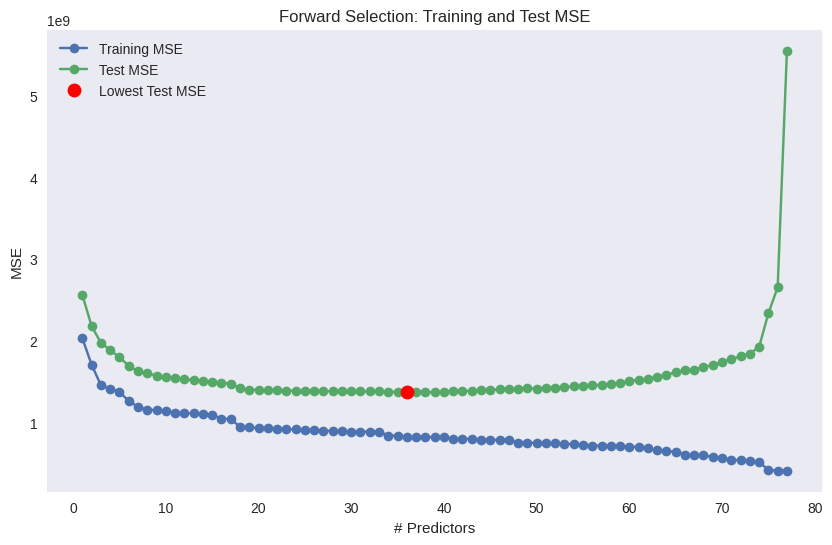

In [679]:
X = transformed_data.drop(columns=['SalePrice'])
Y = transformed_data["SalePrice"]
X_train, X_test, y_train, y_test = split_data(X, Y)

def processSubset(feature_set, X_train, y_train, X_test, y_test):
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()

    train_predictions = regr.predict(X_train[list(feature_set)])
    train_mse = ((train_predictions - y_train) ** 2).mean()

    test_predictions = regr.predict(X_test[list(feature_set)])
    test_mse = ((test_predictions - y_test) ** 2).mean()

    return {'model': regr, 'train_mse': train_mse, 'test_mse': test_mse}

def forward(predictors, X_train, y_train, X_test, y_test):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, X_test, y_test))

    models = pd.DataFrame(results)

    best_model = models.loc[models['test_mse'].argmin()]

    return best_model

models_train = pd.DataFrame(columns=['train_mse', 'test_mse', 'model'])

predictors = []

# Forward selection loop
for i in range(1, len(X.columns) + 1):
    best_model = forward(predictors, X_train, y_train, X_test, y_test)
    models_train.loc[i] = best_model
    predictors = best_model['model'].model.exog_names

plt.figure(figsize=(10, 6))
plt.plot(models_train['train_mse'], label='Training MSE', marker='o')
plt.plot(models_train['test_mse'], label='Test MSE', marker='o')

min_index = models_train['test_mse'].argmin()
min_test_mse = models_train['test_mse'].min()

plt.plot(min_index, min_test_mse, 'ro', markersize=10, label='Lowest Test MSE')

plt.xlabel('# Predictors')
plt.ylabel('MSE')
plt.title('Forward Selection: Training and Test MSE')
plt.legend()
plt.grid()
plt.show()

In [680]:
# Run the model on the whole data set
X = transformed_data[selected_predictors]
Y = transformed_data["SalePrice"]

ols_sm = sm.OLS(Y, sm.add_constant(X))
ols_sm_results = ols_sm.fit()
print(ols_sm_results.summary())

Y_pred = ols_sm_results.predict(sm.add_constant(X))
MSE = mean_squared_error(Y, Y_pred)
R2 = r2_score(Y, Y_pred)
print(f"Mean Squared Error MSE: {MSE:.4f}")
print(f"R-squared             : {R2:.4f}")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:24:03   Log-Likelihood:                -11638.
No. Observations:                1000   AIC:                         2.335e+04
Df Residuals:                     965   BIC:                         2.352e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.301e+06 